<a href="https://colab.research.google.com/github/rickwag/ML/blob/main/AmazonReviewsClassification(NLP).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#data acquisation
data_url = "/content/sample_data/AmazonReviews.csv"

import pandas as pd

df = pd.read_csv(data_url)

In [ ]:
df.head(5)

,text,label
0,Stuning even for the non-gamer: This sound tr...,__label__2
1,The best soundtrack ever to anything.: I'm re...,__label__2
2,Amazing!: This soundtrack is my favorite musi...,__label__2
3,Excellent Soundtrack: I truly like this sound...,__label__2
4,"Remember, Pull Your Jaw Off The Floor After H...",__label__2


In [ ]:
df["label"].unique()

array(['__label__2 ', '__label__1 '], dtype=object)

In [ ]:
df.shape

(10000, 2)

##Data preprocessing

In [ ]:
#convert into lowercase
df["text"] = [entry.lower() for entry in df["text"]]

df.head(5)

,text,label
0,stuning even for the non-gamer: this sound tr...,__label__2
1,the best soundtrack ever to anything.: i'm re...,__label__2
2,amazing!: this soundtrack is my favorite musi...,__label__2
3,excellent soundtrack: i truly like this sound...,__label__2
4,"remember, pull your jaw off the floor after h...",__label__2


In [ ]:
#tokenization
import nltk
nltk.download("punkt")

from nltk.tokenize import word_tokenize

df["text"] = [word_tokenize(entry) for entry in df["text"]]

df.head(5)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


,text,label
0,"[stuning, even, for, the, non-gamer, :, this, ...",__label__2
1,"[the, best, soundtrack, ever, to, anything, .,...",__label__2
2,"[amazing, !, :, this, soundtrack, is, my, favo...",__label__2
3,"[excellent, soundtrack, :, i, truly, like, thi...",__label__2
4,"[remember, ,, pull, your, jaw, off, the, floor...",__label__2


In [ ]:
#stopwords removal and lemmatization
nltk.download("stopwords")
nltk.download("wordnet")
nltk.download("omw-1.4")

lemmatizer = WordNetLemmatizer()

for index, doc in enumerate(df["text"]):
  new_doc = []
  for token in doc:
    if token not in stopwords.words("english"):
      token = lemmatizer.lemmatize(token)
      new_doc.append(token)
  
  df.loc[index, "text_final"] = str(new_doc)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
df.head(5)

,text,label,text_final
0,"[stuning, even, for, the, non-gamer, :, this, ...",__label__2,"['stuning', 'even', 'non-gamer', ':', 'sound',..."
1,"[the, best, soundtrack, ever, to, anything, .,...",__label__2,"['best', 'soundtrack', 'ever', 'anything', '.'..."
2,"[amazing, !, :, this, soundtrack, is, my, favo...",__label__2,"['amazing', '!', ':', 'soundtrack', 'favorite'..."
3,"[excellent, soundtrack, :, i, truly, like, thi...",__label__2,"['excellent', 'soundtrack', ':', 'truly', 'lik..."
4,"[remember, ,, pull, your, jaw, off, the, floor...",__label__2,"['remember', ',', 'pull', 'jaw', 'floor', 'hea..."


In [ ]:
#training and testing split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df["text_final"], df["label"], test_size=.2)

In [ ]:
#encoding (labels)

from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.fit_transform(y_test)

In [ ]:
#word vectorization
from sklearn.feature_extraction.text import TfidfVectorizer

Tfid_vectorizer = TfidfVectorizer(max_features = 5000)
Tfid_vectorizer.fit(df["text_final"])

X_train = Tfid_vectorizer.transform(X_train)
X_test = Tfid_vectorizer.transform(X_test)

In [ ]:
#model creation (naive bayes)
from sklearn import naive_bayes

naive_model = naive_bayes.MultinomialNB()

In [ ]:
#model training
naive_model.fit(X_train, y_train)

MultinomialNB()

In [ ]:
#model evaluation
#accuracy
naive_model.score(X_test, y_test)

0.8435

In [ ]:
predictions = naive_model.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, predictions)
cm

array([[885, 170],
       [143, 802]])

Text(33.0, 0.5, 'truth')

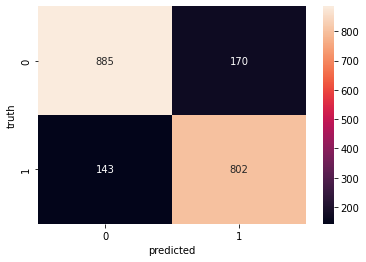

In [101]:
import seaborn as sb
import matplotlib.pyplot as plt

sb.heatmap(cm, annot = True, fmt = "d")

plt.xlabel("predicted")
plt.ylabel("truth")

In [103]:
#model creation (SVM)
from sklearn import svm

svm_model = svm.SVC(kernel="linear", gamma="auto")

In [104]:
#model training
svm_model.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [105]:
#model evaluation
svm_model.score(X_test, y_test)

0.8565